In [3]:
from typing import List
from pathlib import Path
import pandas as pd
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly_express as px

init_notebook_mode()

In [6]:
CSV_PATH = Path("../data/csvs/studis.csv")

In [7]:
df = pd.read_csv(CSV_PATH)

In [47]:
## Feature engineering

# pctg gender
df["pctg_female"] = df.n_women / df.n_total

In [48]:
df.semester.unique()

array(['sommer2016', 'sommer2018', 'sommer2017', 'winter2016',
       'winter2018', 'winter2017'], dtype=object)

# Select common bachelors and master

In [49]:
THRESHOLD_BACHELOR = 50
SEMESTER = "winter2018"

In [50]:
df_bachelor = df[
    (df.degree == "Bachelor") &
    (df.semester == SEMESTER) &
    (df.n_total >= THRESHOLD_BACHELOR)
]

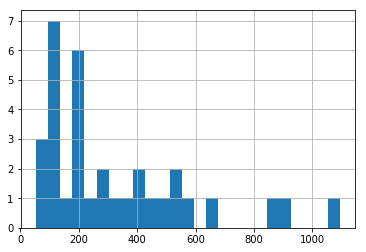

In [51]:
df_bachelor.n_total.hist(bins=25)

In [52]:
common_subjects = df_bachelor[df_bachelor.n_total >= THRESHOLD_BACHELOR].subject.unique()

In [68]:
df_bachelor = df_bachelor.sort_values(by="pctg_female", ascending=False)

In [69]:
df_bachelor.head()

,subject,degree,n_total,n_women,n_foreign,sem_0,sem_1,sem_2,sem_3,sem_4,...,sem_8,sem_9,sem_10,sem_11,sem_12,sem_l12,year,season,semester,pctg_female
2583,Pferdewissenschaft,Bachelor,115,113,2,0,30,0,29,0,...,0,12,0,0,0,0,2018,winter,winter2018,0.982609
2495,Koreastudien/Ostasienwissenschaften,Bachelor,210,172,22,0,68,0,43,2,...,3,21,2,2,2,11,2018,winter,winter2018,0.819048
2222,Bildungs- und Erziehungswissenschaft,Bachelor,508,406,60,0,118,2,98,3,...,7,30,3,10,2,35,2018,winter,winter2018,0.799213
2625,Psychologie,Bachelor,639,486,86,0,140,4,124,18,...,9,34,2,20,2,32,2018,winter,winter2018,0.760563
2403,Geschichte und Kultur des Vorderen Orients mit...,Bachelor,112,79,31,0,30,0,23,0,...,2,10,0,6,2,11,2018,winter,winter2018,0.705357


In [110]:
ys.round(2)

array([0.98, 0.82, 0.8 , 0.76, 0.71, 0.69, 0.69, 0.68, 0.67, 0.66, 0.64,
       0.62, 0.62, 0.61, 0.6 , 0.58, 0.57, 0.57, 0.53, 0.53, 0.51, 0.5 ,
       0.48, 0.46, 0.45, 0.41, 0.41, 0.41, 0.39, 0.38, 0.38, 0.3 , 0.2 ])

In [111]:
labels = df_bachelor.subject.values
ys = df_bachelor.pctg_female.values.round(2)
widths = df_bachelor.n_total.values + 100

xs_left = [0]
for width in widths:
    xs_left.append(xs_left[-1] + width)
xs = [ (a + b) // 2 for (a, b) in zip(xs_left, xs_left[1:])]

In [112]:
trace = go.Bar(
    x=xs, y=ys, width=widths, text=labels, textposition="auto"
)

data = [trace]

fig = go.Figure(data)

In [113]:
iplot(fig)

In [95]:
?go.Bar

In [42]:
COMMON_DEGREES = ['Staatsexamen', 'Abschl.außerh.Deutschland',
       'LA Bachelor ISS und Gym.', 'Promotion', 'Mehr-Fächer-Bachelor',
       'Master', 'Bachelor']

In [43]:
df = df[df.degree.isin(COMMON_DEGREES)]

In [62]:
SEMESTER_ORDER = ["sommer2016", "winter2016", "sommer2017", "winter2017", "sommer2018", "winter2018"]

In [63]:
df["sem_index"] = df.semester.apply(lambda sem: SEMESTER_ORDER.index(sem))

In [78]:
df_ = df[(df.n_total > 200)].sort_values("sem_index")

px.line(
    df_,
    x="sem_index",
    y="pctg_female",
    line_group="subject",
    #hover_data=df.columns,
    hover_name="subject",
    #text="subject",
    color="degree",
    line_shape="spline",
    category_orders={"semester": SEMESTER_ORDER}
)

In [7]:
DEGREE = "Bachelor"

In [25]:
DEGREE = "Master"

In [8]:
df_2017 = df[df.year == 2017]

In [9]:
df_2017[df_2017.pctg_female <= 1].pctg_female.mean()

0.5999106100939007

In [10]:
df_ = df[(df.n_total > 20) & (df.degree == DEGREE)]

In [11]:
df_.groupby("subject").pctg_female.mean().sort_values()

subject
Informatik                                                                        0.209322
Physik                                                                            0.291733
Volkswirtschaftslehre                                                             0.352187
Geologische Wissenschaften                                                        0.378141
Geographische Wissenschaften                                                      0.387748
Mathematik                                                                        0.402951
Chemie                                                                            0.407997
Bioinformatik                                                                     0.436664
Medieninformatik                                                                  0.442263
Meteorologie                                                                      0.443163
Politikwissenschaft                                                               